In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [9]:
x,y= make_regression(n_samples=100,n_features=1,noise=10)
y=y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


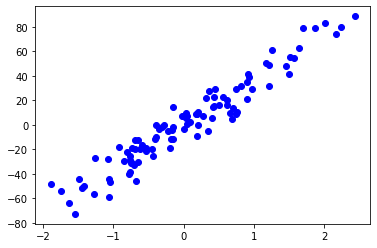

In [10]:
plt.figure()
plt.scatter(x,y,c='b',label='datasets')
X=np.hstack((x,np.ones(x.shape)))

In [11]:
theta=np.random.randn(2,1)
print(theta)

[[-0.67383859]
 [ 1.07462044]]


In [12]:
#le model
def modele(X,theta):
    return X.dot(theta)
#le fonction cout
def cost_fonction(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((modele(X,theta)-y)**2)
#la fonction Gradients
def grad(X,y,theta):
    m=len(y)
    return 1/m*X.T.dot((modele(X,theta)-y))
#la fonction gradients
def gradient_descente(X,y,theta,learning_rate,n_iteration):
    ll=np.ones(n_iteration)
    for i in range(n_iteration):
        theta=theta-learning_rate*grad(X,y,theta)
        ll[i]=cost_fonction(X,y,theta)
    return theta,ll
# la fonction descente de gradients
def coef_regression(y,prediction):
    num=np.sum((y-prediction)**2)
    den=np.sum((y-np.mean(y))**2)
    r=1-(num/den)
    return r

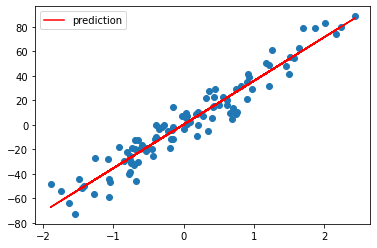

In [13]:
theta_finale,ll=gradient_descente(X,y,theta,learning_rate=0.01,n_iteration=600)
predictions=modele(X,theta_finale)
plt.scatter(x,y)
plt.plot(x,predictions,c='r',label='prediction')
plt.legend()

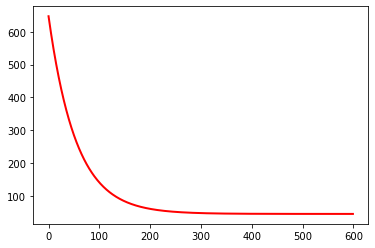

R^2 =  0.9276777672846157


In [14]:
plt.figure()
plt.plot(ll,c='r',lw=2,label='fonction cout')
plt.show()
print('R^2 = ',coef_regression(y,predictions))
